In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, MinMaxScaler
from scipy.sparse import coo_matrix, csr_matrix
%matplotlib inline
import os 

In [9]:
os.chdir("/Users/sanyas/Desktop/projects")

In [10]:
df_1 = pd.read_csv("Norway_Stan.csv")
df_well = pd.read_csv("Norway.csv")
#Merge the 2 CSVs by API number
df_merged = df_well.merge(df_1, how = "left", on = "Name")
print(df_merged.head())

   Unnamed: 0_x    Name               Surface        X_x         Y_x       Z  \
0         21675  10/4-1  CROMER KNOLL GP. Top  628531.41  6394710.62 -1350.9   
1         21675  10/4-1  CROMER KNOLL GP. Top  628531.41  6394710.62 -1350.9   
2         21675  10/4-1  CROMER KNOLL GP. Top  628531.41  6394710.62 -1350.9   
3         21675  10/4-1  CROMER KNOLL GP. Top  628531.41  6394710.62 -1350.9   
4         21675  10/4-1  CROMER KNOLL GP. Top  628531.41  6394710.62 -1350.9   

       MD  Geological age  TVT  TST  ... Unnamed: 34  Unnamed: 35  \
0  1382.0            4.21  NaN  NaN  ...         NaN          NaN   
1  1382.0            4.21  NaN  NaN  ...         NaN          NaN   
2  1382.0            4.21  NaN  NaN  ...         NaN          NaN   
3  1382.0            4.21  NaN  NaN  ...         NaN          NaN   
4  1382.0            4.21  NaN  NaN  ...         NaN          NaN   

   Unnamed: 36  Unnamed: 37  Unnamed: 0_y        X_y         Y_y  \
0          NaN          NaN         

In [11]:
df_merged.head()

,Unnamed: 0_x,Name,Surface,X_x,Y_x,Z,MD,Geological age,TVT,TST,...,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 0_y,X_y,Y_y,True Vertical Depth,Normalized TVD,Formation
0,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,0,628531.41,6394710.62,-23025.90,0.112166,-1.215791
1,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,1,628531.41,6394710.62,-23010.90,0.112748,-1.176869
2,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,2,628531.47,6394710.62,-23037.90,0.111701,-1.137946
3,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,3,628531.50,6394710.61,-23061.90,0.110770,-1.099024
4,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,4,628531.27,6394713.59,-23910.88,0.077844,-1.060102


In [12]:
df_holdout = df_merged.sample(frac=0.2, random_state=4242001)
#make list of API numbers that we held out
heldout_APIs = []
for i in df_holdout["Name"]:
    heldout_APIs.append(i)
#now we need to go back to our original Dataframe and set the vals we are holding out to 0
print(df_holdout.head())
df_merged_heldout = df_merged.copy()
df_merged_heldout.iloc[2933, 6] = 0
df_merged_heldout.iloc[2439, 6] = 0
df_merged_heldout.iloc[3298, 6] = 0
df_merged_heldout.iloc[542, 6] = 0
df_merged_heldout.iloc[5466, 6] = 0

        Unnamed: 0_x        Name            Surface        X_x         Y_x  \
217802         18224  30/3-7 ST2       Cook Fm. Top  494442.06  6738748.59   
22693           1872      15/3-6  HORDALAND GP. Top  427953.32  6515614.84   
177567         17746    25/6-4 S      Skade Fm. Top  493457.44  6616625.75   
262069          3283      30/9-7     Roedby Fm. Top  486338.03  6698145.39   
64140           6165     16/1-12      Lista Fm. Top  457489.40  6518854.62   

              Z      MD  Geological age  TVT  TST  ... Unnamed: 34  \
217802 -5082.00  5138.0          188.00  NaN  NaN  ...         NaN   
22693   -885.00   910.0           13.00  NaN  NaN  ...         NaN   
177567 -1167.89  1197.0            1.00  NaN  NaN  ...         NaN   
262069 -2745.00  2768.0           98.90  NaN  NaN  ...         NaN   
64140  -1751.95  1777.0            1.77  NaN  NaN  ...         NaN   

        Unnamed: 35  Unnamed: 36  Unnamed: 37  Unnamed: 0_y        X_y  \
217802          NaN          NaN    

In [13]:
df_merged.rename(columns={"True Vertical Depth": "TVD"})

,Unnamed: 0_x,Name,Surface,X_x,Y_x,Z,MD,Geological age,TVT,TST,...,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 0_y,X_y,Y_y,TVD,Normalized TVD,Formation
0,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,0,628531.41,6394710.62,-23025.90,0.112166,-1.215791
1,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,1,628531.41,6394710.62,-23010.90,0.112748,-1.176869
2,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,2,628531.47,6394710.62,-23037.90,0.111701,-1.137946
3,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,3,628531.50,6394710.61,-23061.90,0.110770,-1.099024
4,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,4,628531.27,6394713.59,-23910.88,0.077844,-1.060102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484299,18872,9/8-1,HORDALAND GP. Top,580466.31,6356474.78,-537.5,568.0,13.00,NaN,NaN,...,NaN,NaN,NaN,NaN,21671,580466.31,6356474.78,-20080.50,0.226400,-0.631959
484300,18872,9/8-1,HORDALAND GP. Top,580466.31,6356474.78,-537.5,568.0,13.00,NaN,NaN,...,NaN,NaN,NaN,NaN,21672,580466.31,6356474.78,-18944.50,0.270458,-0.593036
484301,18872,9/8-1,HORDALAND GP. Top,580466.31,6356474.78,-537.5,568.0,13.00,NaN,NaN,...,NaN,NaN,NaN,NaN,21673,580466.31,6356474.78,-20622.50,0.205379,-0.554114
484302,18872,9/8-1,HORDALAND GP. Top,580466.31,6356474.78,-537.5,568.0,13.00,NaN,NaN,...,NaN,NaN,NaN,NaN,21674,580466.31,6356474.78,-20662.50,0.203828,-0.515192


In [14]:
df_merged['True Vertical Depth'] = df_merged['True Vertical Depth'] - df_merged['True Vertical Depth'].min()

In [15]:
D_df = df_merged.pivot_table('True Vertical Depth',"Formation","Name").fillna(0)
df_merged[["True Vertical Depth", "Formation", "Name"]]

,True Vertical Depth,Formation,Name
0,2892.10,-1.215791,10/4-1
1,2907.10,-1.176869,10/4-1
2,2880.10,-1.137946,10/4-1
3,2856.10,-1.099024,10/4-1
4,2007.12,-1.060102,10/4-1
...,...,...,...
484299,5837.50,-0.631959,9/8-1
484300,6973.50,-0.593036,9/8-1
484301,5295.50,-0.554114,9/8-1
484302,5255.50,-0.515192,9/8-1


In [16]:
D_df

Name,10/4-1,10/5-1,10/7-1,10/8-1,11/10-1,11/5-1,11/9-1,15/12-1,15/12-10 S,15/12-11 S,...,9/2-8 ST4,9/2-9 S,9/3-1,9/3-2,9/4-1,9/4-2,9/4-3,9/4-4,9/4-5,9/8-1
Formation,,,,,,,,,,,,,,,,,,,,,
-1.215791,2892.10,4073.0,11236.12,3308.0,5606.65,4450.07,0.0,21744.44,21541.85,21544.0,...,8552.050,8345.24,6506.31,6284.11,5674.0,5448.0,5506.0,5564.0,5443.05,5448.5
-1.176869,2907.10,4067.0,0.00,3319.0,5593.65,0.00,0.0,21731.44,21533.85,21537.0,...,8541.050,8350.24,6499.31,0.00,5690.0,5446.0,5508.0,5570.0,0.00,5456.5
-1.137946,2880.10,4031.0,0.00,3303.0,0.00,4400.09,0.0,0.00,0.00,0.0,...,8525.410,8300.65,6478.32,6292.11,5673.0,5421.0,5470.0,5522.0,0.00,0.0
-1.099024,2856.10,3981.0,0.00,3185.0,5593.65,4110.11,0.0,0.00,21523.63,21544.0,...,8420.670,8250.06,6387.34,6185.13,5645.0,5399.0,5392.0,5409.0,0.00,5388.5
-1.060102,2007.12,3635.0,10730.19,0.0,0.00,3549.12,0.0,21606.45,21360.97,21380.0,...,6961.305,6886.74,5575.75,4703.39,5201.0,4909.0,4974.0,4704.0,4747.11,5147.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.871034,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
2.909956,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
2.948878,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0


In [17]:
mms = MinMaxScaler()
R = D_df.values
target_vals = df_holdout["True Vertical Depth"]
well_depth_mean = np.mean(R, axis = 1)
R_normalize = mms.fit_transform(R, target_vals)
R_demeaned = R - well_depth_mean.reshape(-1, 1)

In [18]:
from sklearn.preprocessing import binarize
A = binarize(R)

In [19]:
def runALS(A, R, n_factors, n_iterations, lambda_):
    """
    Runs Alternating Least Squares algorithm in order to calculate matrix.
    :param A: User-Item Matrix with ratings
    :param R: User-Item Matrix with 1 if there is a rating or 0 if not
    :param n_factors: How many factors each of user and item matrix will consider
    :param n_iterations: How many times to run algorithm
    :param lambda_: Regularization parameter
    :return:
    """
    print("Initiating ")
    MAE = []
    for i in range(1, n_factors):
        lambda_ = lambda_
        n_factors = i
        n, m = A.shape
        n_iterations = n_iterations
        Users = 5 * np.random.rand(n, n_factors)
        Items = 5 * np.random.rand(n_factors, m)

        def get_error(A, Users, Items, R):
            # This calculates the MSE of nonzero elements
            return np.sum((R * (A - np.dot(Users, Items))) ** 2) / np.sum(R)

        MSE_List = []

        print("Starting Iterations")
        for iter in range(n_iterations):
            for i, Ri in enumerate(R):
                Users[i] = np.linalg.solve(
                    np.dot(Items, np.dot(np.diag(Ri), Items.T))
                    + lambda_ * np.eye(n_factors),
                    np.dot(Items, np.dot(np.diag(Ri), A[i].T)),
                    ).T
            print(
                "Error after solving for User Matrix:",
                get_error(A, Users, Items, R),
                )

            for j, Rj in enumerate(R.T):
                Items[:, j] = np.linalg.solve(
                    np.dot(Users.T, np.dot(np.diag(Rj), Users))
                    + lambda_ * np.eye(n_factors),
                    np.dot(Users.T, np.dot(np.diag(Rj), A[:, j])),
                    )
            print(
                "Error after solving for Item Matrix:",
                 get_error(A, Users, Items, R),
                )

            MSE_List.append(get_error(A, Users, Items, R))
            print("%sth iteration is complete..." % iter)
        MAE.append(MSE_List)
    return Users, Items, MAE

In [20]:
U, Vt, M_list = runALS(R, A, 20, 5, 0.1)

Initiating 
Starting Iterations
Error after solving for User Matrix: 76825606.03401762
Error after solving for Item Matrix: 1657422.830562255
0th iteration is complete...
Error after solving for User Matrix: 553905.5905864761
Error after solving for Item Matrix: 309371.89839755674
1th iteration is complete...
Error after solving for User Matrix: 281022.5822604279
Error after solving for Item Matrix: 276860.36818816117
2th iteration is complete...
Error after solving for User Matrix: 276133.45968503307
Error after solving for Item Matrix: 275971.014123592
3th iteration is complete...
Error after solving for User Matrix: 275917.0137965476
Error after solving for Item Matrix: 275904.21567212045
4th iteration is complete...
Starting Iterations
Error after solving for User Matrix: 65282093.30595406
Error after solving for Item Matrix: 1159485.0539361765
0th iteration is complete...
Error after solving for User Matrix: 290672.3803652363
Error after solving for Item Matrix: 140483.2476626118


Error after solving for User Matrix: 14165.69241588601
Error after solving for Item Matrix: 8606.044768568589
2th iteration is complete...
Error after solving for User Matrix: 6378.470765044838
Error after solving for Item Matrix: 4471.877435325766
3th iteration is complete...
Error after solving for User Matrix: 3666.39381677206
Error after solving for Item Matrix: 2950.9890857969613
4th iteration is complete...
Starting Iterations
Error after solving for User Matrix: 40613968.12381381
Error after solving for Item Matrix: 141550.23106880687
0th iteration is complete...
Error after solving for User Matrix: 67963.08520965351
Error after solving for Item Matrix: 24930.9421606377
1th iteration is complete...
Error after solving for User Matrix: 15660.78530349669
Error after solving for Item Matrix: 8730.031699236755
2th iteration is complete...
Error after solving for User Matrix: 6264.260261914817
Error after solving for Item Matrix: 4205.5187531271
3th iteration is complete...
Error aft

In [21]:
MAE_max = []
#get a list of the max errors from each value of n_factor
for i in M_list:
    MAE_max.append(max(i))
#The index of the minimum max error is the optimal n_factor value
print(MAE_max.index(min(MAE_max)))

18


In [22]:
recommendations = np.dot(U, Vt)
recsys = pd.DataFrame(data = recommendations[0:, 0:], index = D_df.index,
                        columns = D_df.columns)
recsys.head()

Name,10/4-1,10/5-1,10/7-1,10/8-1,11/10-1,11/5-1,11/9-1,15/12-1,15/12-10 S,15/12-11 S,...,9/2-8 ST4,9/2-9 S,9/3-1,9/3-2,9/4-1,9/4-2,9/4-3,9/4-4,9/4-5,9/8-1
Formation,,,,,,,,,,,,,,,,,,,,,
-1.215791,2886.720176,4028.570922,11236.121208,3286.974391,5605.774144,4450.066915,2540.453078,21745.481478,21542.714351,21526.590790,...,8553.591301,8342.525688,6505.014711,6283.864410,5640.788560,5444.575477,5456.524674,5542.012889,5443.319054,5449.174717
-1.176869,2909.383555,4036.554951,11425.064637,3321.598211,5593.556389,4305.450859,2590.671468,21730.300439,21533.931310,21549.565021,...,8543.699099,8351.575427,6499.896458,6368.499458,5695.903387,5448.545565,5510.773654,5572.614650,5927.460571,5456.696587
-1.137946,2881.964425,4010.994982,12356.272227,3302.830423,7022.751576,4400.089000,2809.389335,22189.097667,24231.831029,22454.436423,...,8526.537934,8300.366865,6478.334274,6292.580622,5669.571934,5421.396589,5466.549231,5520.427209,5050.715595,6111.079958
-1.099024,2856.220425,4072.370327,12200.839693,3199.335209,5594.509352,4110.114095,2643.636045,21888.804947,21522.440804,21544.415359,...,8416.401568,8251.334797,6387.230150,6185.286010,5673.697499,5402.061463,5439.968746,5430.700338,5360.966149,5387.811534
-1.060102,2007.452203,3632.739459,10730.190605,669.210257,2942.538438,3549.120157,3830.531950,21606.189922,21361.061093,21435.298481,...,6961.329225,6886.596136,5575.786182,4703.513425,5198.551065,4909.461909,4970.985899,4702.953784,4747.099602,5147.495777


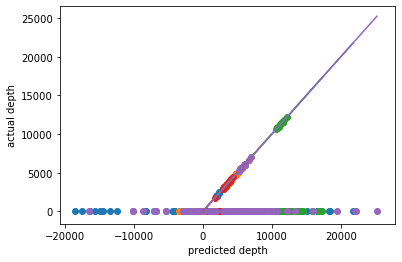

In [23]:
for i in range(5):
    plt.scatter(recsys.iloc[0:, i].values, D_df.iloc[0:, i].values) #plot predicted vs actual
    plt.xlabel('predicted depth')
    plt.ylabel('actual depth')
    plt.plot(np.arange(0,recsys.iloc[0:,i].max()))

In [24]:
recsys.head()

Name,10/4-1,10/5-1,10/7-1,10/8-1,11/10-1,11/5-1,11/9-1,15/12-1,15/12-10 S,15/12-11 S,...,9/2-8 ST4,9/2-9 S,9/3-1,9/3-2,9/4-1,9/4-2,9/4-3,9/4-4,9/4-5,9/8-1
Formation,,,,,,,,,,,,,,,,,,,,,
-1.215791,2886.720176,4028.570922,11236.121208,3286.974391,5605.774144,4450.066915,2540.453078,21745.481478,21542.714351,21526.590790,...,8553.591301,8342.525688,6505.014711,6283.864410,5640.788560,5444.575477,5456.524674,5542.012889,5443.319054,5449.174717
-1.176869,2909.383555,4036.554951,11425.064637,3321.598211,5593.556389,4305.450859,2590.671468,21730.300439,21533.931310,21549.565021,...,8543.699099,8351.575427,6499.896458,6368.499458,5695.903387,5448.545565,5510.773654,5572.614650,5927.460571,5456.696587
-1.137946,2881.964425,4010.994982,12356.272227,3302.830423,7022.751576,4400.089000,2809.389335,22189.097667,24231.831029,22454.436423,...,8526.537934,8300.366865,6478.334274,6292.580622,5669.571934,5421.396589,5466.549231,5520.427209,5050.715595,6111.079958
-1.099024,2856.220425,4072.370327,12200.839693,3199.335209,5594.509352,4110.114095,2643.636045,21888.804947,21522.440804,21544.415359,...,8416.401568,8251.334797,6387.230150,6185.286010,5673.697499,5402.061463,5439.968746,5430.700338,5360.966149,5387.811534
-1.060102,2007.452203,3632.739459,10730.190605,669.210257,2942.538438,3549.120157,3830.531950,21606.189922,21361.061093,21435.298481,...,6961.329225,6886.596136,5575.786182,4703.513425,5198.551065,4909.461909,4970.985899,4702.953784,4747.099602,5147.495777
